In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

16

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1133
number of class2:484

 ****** Running generation 0 ****** 

Population's average fitness: 0.47053 stdev: 0.15255
Best fitness: 0.80767 - size: (2, 13) - species 3 - id 125
Average adjusted fitness: 0.325
Mean genetic distance 2.979, standard deviation 0.506
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 6.401 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56686 stdev: 0.15739
Best fitness: 0.84910 - size: (3, 15) - species 8 - id 264
Average adjusted fitness: 0.309
Mean genetic distance 3.062, standard deviation 0.528
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.865 sec (6.633 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59212 stdev: 0.15980
Best fitness: 0.84910 - size: (3, 15) - species 8 - id 264
Average adjusted fitness: 0.334
Mean genetic distance 3.094, standard deviation 0.513
Population of 199 members in 29 species
Total extincti

Population's average fitness: 0.68031 stdev: 0.16024
Best fitness: 0.85838 - size: (3, 15) - species 8 - id 2990
Average adjusted fitness: 0.396
Mean genetic distance 3.236, standard deviation 0.523
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.765 sec (7.172 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69070 stdev: 0.14773
Best fitness: 0.85838 - size: (3, 15) - species 8 - id 2990
Average adjusted fitness: 0.414
Mean genetic distance 3.237, standard deviation 0.527
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.365 sec (7.195 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.68835 stdev: 0.14969
Best fitness: 0.85838 - size: (3, 15) - species 8 - id 2990
Average adjusted fitness: 0.388
Mean genetic distance 3.211, standard deviation 0.526
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 7.428 sec (7.226 average)

 ****** Ru

Population's average fitness: 0.62559 stdev: 0.10817
Best fitness: 0.82375 - size: (4, 16) - species 38 - id 2030
Average adjusted fitness: 0.295
Mean genetic distance 3.136, standard deviation 0.456
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 9.149 sec (7.997 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63879 stdev: 0.10680
Best fitness: 0.82375 - size: (4, 16) - species 38 - id 2030
Average adjusted fitness: 0.340
Mean genetic distance 3.157, standard deviation 0.459
Population of 190 members in 40 species
Total extinctions: 0
Generation time: 10.455 sec (8.297 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63571 stdev: 0.11352
Best fitness: 0.82375 - size: (4, 16) - species 38 - id 2030
Average adjusted fitness: 0.296
Mean genetic distance 3.160, standard deviation 0.473
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 8.111 sec (8.379 average)

 *****

Mean genetic distance 3.112, standard deviation 0.502
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.048 sec (6.583 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59852 stdev: 0.08663
Best fitness: 0.76871 - size: (5, 19) - species 12 - id 838
Average adjusted fitness: 0.254
Mean genetic distance 3.111, standard deviation 0.508
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.940 sec (6.627 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60510 stdev: 0.09350
Best fitness: 0.76871 - size: (5, 19) - species 12 - id 838
Average adjusted fitness: 0.352
Mean genetic distance 3.082, standard deviation 0.489
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.108 sec (6.681 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60479 stdev: 0.08531
Best fitness: 0.76871 - size: (5, 19) - species 12 - id 838
Averag

Mean genetic distance 3.185, standard deviation 0.487
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 8.472 sec (8.173 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61433 stdev: 0.10936
Best fitness: 0.79963 - size: (4, 18) - species 20 - id 1580
Average adjusted fitness: 0.259
Mean genetic distance 3.186, standard deviation 0.491
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 8.497 sec (8.224 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61296 stdev: 0.10749
Best fitness: 0.79963 - size: (4, 18) - species 20 - id 1580
Average adjusted fitness: 0.290
Mean genetic distance 3.192, standard deviation 0.509
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 8.086 sec (8.226 average)
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.50520 stdev: 0.06414
Best fitness: 0.6920

Mean genetic distance 3.129, standard deviation 0.519
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 7.854 sec (7.850 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63132 stdev: 0.09534
Best fitness: 0.79963 - size: (8, 28) - species 31 - id 3230
Average adjusted fitness: 0.265
Mean genetic distance 3.102, standard deviation 0.523
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 7.783 sec (7.840 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63761 stdev: 0.09067
Best fitness: 0.79963 - size: (8, 28) - species 31 - id 3230
Average adjusted fitness: 0.282
Mean genetic distance 3.076, standard deviation 0.517
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.983 sec (7.823 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63065 stdev: 0.08915
Best fitness: 0.79963 - size: (8, 28) - species 31 - id 3230


Total extinctions: 0
Generation time: 7.741 sec (7.564 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62592 stdev: 0.10442
Best fitness: 0.77365 - size: (4, 17) - species 2 - id 1938
Average adjusted fitness: 0.236
Mean genetic distance 3.132, standard deviation 0.477
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.835 sec (7.651 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63024 stdev: 0.09807
Best fitness: 0.77365 - size: (4, 17) - species 2 - id 1938
Average adjusted fitness: 0.268
Mean genetic distance 3.110, standard deviation 0.473
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.825 sec (7.701 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62163 stdev: 0.10934
Best fitness: 0.77365 - size: (4, 17) - species 2 - id 1938
Average adjusted fitness: 0.284
Mean genetic distance 3.104, standard deviation 0.483
Population 

Mean genetic distance 3.042, standard deviation 0.489
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 6.760 sec (6.421 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57677 stdev: 0.07486
Best fitness: 0.73284 - size: (3, 15) - species 33 - id 213
Average adjusted fitness: 0.177
Mean genetic distance 3.067, standard deviation 0.504
Population of 209 members in 37 species
Total extinctions: 0
Generation time: 7.273 sec (6.591 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57130 stdev: 0.07830
Best fitness: 0.73284 - size: (3, 15) - species 33 - id 213
Average adjusted fitness: 0.187
Mean genetic distance 3.068, standard deviation 0.512
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.252 sec (6.702 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58112 stdev: 0.08176
Best fitness: 0.73284 - size: (3, 15) - species 33 - id 213
Averag

Mean genetic distance 3.190, standard deviation 0.536
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 8.605 sec (8.000 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63484 stdev: 0.09131
Best fitness: 0.78664 - size: (10, 27) - species 2 - id 3759
Average adjusted fitness: 0.285
Mean genetic distance 3.198, standard deviation 0.536
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.223 sec (8.069 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63281 stdev: 0.09210
Best fitness: 0.78664 - size: (10, 27) - species 2 - id 3759
Average adjusted fitness: 0.250
Mean genetic distance 3.192, standard deviation 0.532
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 8.423 sec (8.150 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62451 stdev: 0.09694
Best fitness: 0.78664 - size: (10, 27) - species 2 - id 3759


Mean genetic distance 3.117, standard deviation 0.504
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.700 sec (7.553 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60380 stdev: 0.08820
Best fitness: 0.74459 - size: (2, 13) - species 3 - id 966
Average adjusted fitness: 0.237
Mean genetic distance 3.125, standard deviation 0.499
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.763 sec (7.464 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60312 stdev: 0.09090
Best fitness: 0.74459 - size: (2, 13) - species 3 - id 966
Average adjusted fitness: 0.211
Mean genetic distance 3.162, standard deviation 0.508
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 7.923 sec (7.525 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60502 stdev: 0.09249
Best fitness: 0.74459 - size: (2, 13) - species 3 - id 966
Averag

Mean genetic distance 3.173, standard deviation 0.492
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.224 sec (6.628 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60082 stdev: 0.06674
Best fitness: 0.75510 - size: (6, 17) - species 34 - id 1499
Average adjusted fitness: 0.230
Mean genetic distance 3.141, standard deviation 0.500
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.378 sec (6.788 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60816 stdev: 0.06822
Best fitness: 0.75510 - size: (6, 17) - species 34 - id 1499
Average adjusted fitness: 0.228
Mean genetic distance 3.130, standard deviation 0.487
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 7.296 sec (6.901 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60658 stdev: 0.06990
Best fitness: 0.75510 - size: (6, 17) - species 34 - id 1499


Population's average fitness: 0.53562 stdev: 0.10288
Best fitness: 0.74706 - size: (2, 13) - species 2 - id 57
Average adjusted fitness: 0.257
Mean genetic distance 3.055, standard deviation 0.502
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.122 sec (5.939 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56080 stdev: 0.10012
Best fitness: 0.77427 - size: (3, 15) - species 6 - id 445
Average adjusted fitness: 0.301
Mean genetic distance 3.079, standard deviation 0.492
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.464 sec (6.114 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58134 stdev: 0.10532
Best fitness: 0.77427 - size: (3, 15) - species 30 - id 445
Average adjusted fitness: 0.246
Mean genetic distance 3.083, standard deviation 0.502
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.647 sec (6.247 average)

 ****** Running

Mean genetic distance 3.166, standard deviation 0.506
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.316 sec (7.732 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64953 stdev: 0.11680
Best fitness: 0.81076 - size: (3, 15) - species 26 - id 1347
Average adjusted fitness: 0.355
Mean genetic distance 3.146, standard deviation 0.501
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.952 sec (7.735 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64920 stdev: 0.11736
Best fitness: 0.81076 - size: (3, 15) - species 26 - id 1347
Average adjusted fitness: 0.328
Mean genetic distance 3.192, standard deviation 0.515
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.276 sec (7.788 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65288 stdev: 0.12500
Best fitness: 0.81076 - size: (3, 15) - species 26 - id 1347


Mean genetic distance 3.240, standard deviation 0.449
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 7.846 sec (7.833 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60103 stdev: 0.08511
Best fitness: 0.76067 - size: (5, 19) - species 8 - id 1053
Average adjusted fitness: 0.248
Mean genetic distance 3.244, standard deviation 0.457
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 7.855 sec (7.819 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60716 stdev: 0.08003
Best fitness: 0.76067 - size: (5, 19) - species 8 - id 1053
Average adjusted fitness: 0.163
Mean genetic distance 3.263, standard deviation 0.451
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 7.941 sec (7.865 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60809 stdev: 0.08326
Best fitness: 0.76809 - size: (6, 25) - species 36 - id 2548
Av

Mean genetic distance 3.209, standard deviation 0.496
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.317 sec (6.737 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61395 stdev: 0.10868
Best fitness: 0.80829 - size: (5, 20) - species 23 - id 961
Average adjusted fitness: 0.311
Mean genetic distance 3.237, standard deviation 0.496
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.633 sec (6.836 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61101 stdev: 0.10946
Best fitness: 0.81633 - size: (4, 16) - species 25 - id 1556
Average adjusted fitness: 0.356
Mean genetic distance 3.211, standard deviation 0.490
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.923 sec (6.945 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61223 stdev: 0.11425
Best fitness: 0.81633 - size: (4, 16) - species 25 - id 1556
Ave

Mean genetic distance 3.198, standard deviation 0.543
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.346 sec (8.453 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65678 stdev: 0.12359
Best fitness: 0.83550 - size: (4, 15) - species 34 - id 3535
Average adjusted fitness: 0.321
Mean genetic distance 3.209, standard deviation 0.549
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 9.327 sec (8.542 average)
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50046 stdev: 0.06495
Best fitness: 0.69388 - size: (2, 13) - species 3 - id 114
Average adjusted fitness: 0.219
Mean genetic distance 2.842, standard deviation 0.463
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.779 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54521 stdev: 0.07714
Best fitness: 0.71429 - size: (3, 15) -

Mean genetic distance 3.090, standard deviation 0.520
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 7.703 sec (7.522 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62783 stdev: 0.09215
Best fitness: 0.79283 - size: (3, 18) - species 20 - id 990
Average adjusted fitness: 0.281
Mean genetic distance 3.099, standard deviation 0.511
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.922 sec (7.590 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62157 stdev: 0.10097
Best fitness: 0.79283 - size: (3, 18) - species 20 - id 990
Average adjusted fitness: 0.262
Mean genetic distance 3.083, standard deviation 0.525
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 7.781 sec (7.596 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63508 stdev: 0.09280
Best fitness: 0.79283 - size: (3, 18) - species 20 - id 990
Ave

Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.344 sec (6.919 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.79688 stdev: 0.21327
Best fitness: 0.97155 - size: (4, 16) - species 19 - id 1957
Average adjusted fitness: 0.669
Mean genetic distance 3.097, standard deviation 0.481
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.349 sec (7.004 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.78847 stdev: 0.21927
Best fitness: 0.97155 - size: (4, 16) - species 19 - id 1957
Average adjusted fitness: 0.667
Mean genetic distance 3.103, standard deviation 0.485
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.330 sec (7.078 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.79739 stdev: 0.21921
Best fitness: 0.97155 - size: (4, 16) - species 19 - id 1957
Average adjusted fitness: 0.682
Mean genetic distance 

Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.819 sec (6.366 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61543 stdev: 0.09211
Best fitness: 0.78355 - size: (4, 18) - species 9 - id 672
Average adjusted fitness: 0.233
Mean genetic distance 3.031, standard deviation 0.508
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.824 sec (6.442 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61905 stdev: 0.09638
Best fitness: 0.78912 - size: (3, 15) - species 2 - id 1120
Average adjusted fitness: 0.272
Mean genetic distance 3.003, standard deviation 0.511
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.907 sec (6.509 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62999 stdev: 0.08500
Best fitness: 0.78912 - size: (3, 15) - species 2 - id 1120
Average adjusted fitness: 0.232
Mean genetic distance 3.022, 

Mean genetic distance 3.154, standard deviation 0.504
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 8.134 sec (8.211 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66977 stdev: 0.09605
Best fitness: 0.81014 - size: (8, 27) - species 37 - id 4340
Average adjusted fitness: 0.269
Mean genetic distance 3.167, standard deviation 0.507
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 8.397 sec (8.235 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.67716 stdev: 0.10222
Best fitness: 0.81880 - size: (5, 18) - species 34 - id 4451
Average adjusted fitness: 0.314
Mean genetic distance 3.198, standard deviation 0.506
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 8.572 sec (8.276 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66228 stdev: 0.10026
Best fitness: 0.81880 - size: (5, 18) - species 34 - id 4451


Mean genetic distance 3.224, standard deviation 0.480
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.766 sec (7.562 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61514 stdev: 0.09737
Best fitness: 0.76314 - size: (8, 26) - species 5 - id 2491
Average adjusted fitness: 0.233
Mean genetic distance 3.223, standard deviation 0.483
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 7.999 sec (7.609 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61977 stdev: 0.09514
Best fitness: 0.76314 - size: (8, 26) - species 5 - id 2491
Average adjusted fitness: 0.224
Mean genetic distance 3.253, standard deviation 0.481
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 8.268 sec (7.687 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62961 stdev: 0.08571
Best fitness: 0.76314 - size: (8, 26) - species 5 - id 2491
Ave

Mean genetic distance 3.221, standard deviation 0.520
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 8.161 sec (7.359 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60479 stdev: 0.10912
Best fitness: 0.78293 - size: (9, 25) - species 33 - id 1578
Average adjusted fitness: 0.311
Mean genetic distance 3.233, standard deviation 0.514
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.568 sec (7.502 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60592 stdev: 0.10758
Best fitness: 0.78293 - size: (9, 25) - species 33 - id 1578
Average adjusted fitness: 0.242
Mean genetic distance 3.211, standard deviation 0.516
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.700 sec (7.642 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62113 stdev: 0.10744
Best fitness: 0.78293 - size: (9, 25) - species 33 - id 1578


Population's average fitness: 0.63374 stdev: 0.14243
Best fitness: 0.82870 - size: (3, 15) - species 1 - id 301
Average adjusted fitness: 0.358
Mean genetic distance 3.020, standard deviation 0.462
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 6.354 sec (6.089 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64859 stdev: 0.12490
Best fitness: 0.82870 - size: (3, 15) - species 31 - id 301
Average adjusted fitness: 0.403
Mean genetic distance 3.057, standard deviation 0.455
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.445 sec (6.178 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66757 stdev: 0.11216
Best fitness: 0.82870 - size: (3, 15) - species 31 - id 301
Average adjusted fitness: 0.349
Mean genetic distance 3.061, standard deviation 0.464
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.863 sec (6.315 average)

 ****** Runni

Population's average fitness: 0.71580 stdev: 0.12983
Best fitness: 0.89734 - size: (10, 28) - species 39 - id 2863
Average adjusted fitness: 0.425
Mean genetic distance 3.161, standard deviation 0.511
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 8.544 sec (8.029 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.70477 stdev: 0.14202
Best fitness: 0.89734 - size: (10, 28) - species 39 - id 2863
Average adjusted fitness: 0.518
Mean genetic distance 3.180, standard deviation 0.505
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 8.129 sec (8.079 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.71297 stdev: 0.13744
Best fitness: 0.89734 - size: (10, 28) - species 39 - id 2863
Average adjusted fitness: 0.446
Mean genetic distance 3.205, standard deviation 0.513
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 8.370 sec (8.140 average)

 ***

Population's average fitness: 0.62952 stdev: 0.13167
Best fitness: 0.76252 - size: (2, 13) - species 33 - id 2043
Average adjusted fitness: 0.319
Mean genetic distance 3.184, standard deviation 0.510
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 7.358 sec (7.407 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64871 stdev: 0.11995
Best fitness: 0.76252 - size: (2, 13) - species 33 - id 2043
Average adjusted fitness: 0.343
Mean genetic distance 3.194, standard deviation 0.507
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 7.413 sec (7.435 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63781 stdev: 0.12815
Best fitness: 0.76252 - size: (2, 13) - species 33 - id 2043
Average adjusted fitness: 0.333
Mean genetic distance 3.211, standard deviation 0.521
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.614 sec (7.466 average)

 ******

Population's average fitness: 0.60323 stdev: 0.08710
Best fitness: 0.80148 - size: (2, 14) - species 20 - id 1266
Average adjusted fitness: 0.270
Mean genetic distance 3.120, standard deviation 0.508
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.030 sec (6.734 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60392 stdev: 0.08313
Best fitness: 0.80148 - size: (2, 14) - species 20 - id 1266
Average adjusted fitness: 0.274
Mean genetic distance 3.142, standard deviation 0.516
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.118 sec (6.772 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59901 stdev: 0.08406
Best fitness: 0.80396 - size: (4, 19) - species 20 - id 1646
Average adjusted fitness: 0.226
Mean genetic distance 3.109, standard deviation 0.518
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.280 sec (6.915 average)

 ****** 

Population's average fitness: 0.63772 stdev: 0.10291
Best fitness: 0.83364 - size: (5, 21) - species 40 - id 4618
Average adjusted fitness: 0.337
Mean genetic distance 3.305, standard deviation 0.494
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.142 sec (8.159 average)
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.49351 stdev: 0.08192
Best fitness: 0.67842 - size: (2, 13) - species 2 - id 114
Average adjusted fitness: 0.218
Mean genetic distance 2.934, standard deviation 0.491
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.721 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54172 stdev: 0.07974
Best fitness: 0.70686 - size: (2, 14) - species 7 - id 213
Average adjusted fitness: 0.199
Mean genetic distance 3.030, standard deviation 0.536
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 6.057 sec (5.8

Population's average fitness: 0.62594 stdev: 0.08527
Best fitness: 0.73717 - size: (7, 23) - species 48 - id 2108
Average adjusted fitness: 0.277
Mean genetic distance 3.187, standard deviation 0.476
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 8.027 sec (7.869 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62230 stdev: 0.08442
Best fitness: 0.74335 - size: (8, 24) - species 28 - id 3185
Average adjusted fitness: 0.274
Mean genetic distance 3.184, standard deviation 0.480
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 7.871 sec (7.851 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61751 stdev: 0.08822
Best fitness: 0.74335 - size: (8, 24) - species 28 - id 3185
Average adjusted fitness: 0.268
Mean genetic distance 3.166, standard deviation 0.474
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 7.807 sec (7.878 average)

 ******

Population's average fitness: 0.59119 stdev: 0.07192
Best fitness: 0.73222 - size: (4, 18) - species 36 - id 2002
Average adjusted fitness: 0.200
Mean genetic distance 3.158, standard deviation 0.483
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.596 sec (7.360 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59484 stdev: 0.07463
Best fitness: 0.73222 - size: (4, 18) - species 36 - id 2002
Average adjusted fitness: 0.171
Mean genetic distance 3.186, standard deviation 0.492
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.959 sec (7.474 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59911 stdev: 0.07731
Best fitness: 0.74088 - size: (3, 14) - species 27 - id 2400
Average adjusted fitness: 0.212
Mean genetic distance 3.195, standard deviation 0.495
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.039 sec (7.577 average)

 ******

Mean genetic distance 3.127, standard deviation 0.504
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 7.224 sec (6.653 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56149 stdev: 0.07047
Best fitness: 0.73531 - size: (2, 13) - species 16 - id 663
Average adjusted fitness: 0.188
Mean genetic distance 3.163, standard deviation 0.499
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 7.739 sec (6.808 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56678 stdev: 0.07263
Best fitness: 0.73964 - size: (3, 16) - species 16 - id 1248
Average adjusted fitness: 0.210
Mean genetic distance 3.180, standard deviation 0.501
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.516 sec (6.896 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57288 stdev: 0.07187
Best fitness: 0.73964 - size: (3, 16) - species 16 - id 1248
Aver

Population of 191 members in 27 species
Total extinctions: 0
Generation time: 8.642 sec (8.412 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.59732 stdev: 0.08572
Best fitness: 0.79283 - size: (4, 19) - species 16 - id 3711
Average adjusted fitness: 0.286
Mean genetic distance 3.247, standard deviation 0.547
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 8.702 sec (8.503 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.60509 stdev: 0.08225
Best fitness: 0.79283 - size: (4, 19) - species 16 - id 3711
Average adjusted fitness: 0.221
Mean genetic distance 3.229, standard deviation 0.546
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.933 sec (8.602 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.60196 stdev: 0.08237
Best fitness: 0.79283 - size: (4, 19) - species 16 - id 3711
Average adjusted fitness: 0.195
Mean genetic distance 

Mean genetic distance 3.197, standard deviation 0.535
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.286 sec (7.934 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65569 stdev: 0.15813
Best fitness: 0.86642 - size: (12, 32) - species 22 - id 3051
Average adjusted fitness: 0.371
Mean genetic distance 3.183, standard deviation 0.527
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.273 sec (8.012 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66059 stdev: 0.14674
Best fitness: 0.86642 - size: (12, 32) - species 22 - id 3051
Average adjusted fitness: 0.370
Mean genetic distance 3.212, standard deviation 0.543
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.401 sec (8.101 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66052 stdev: 0.15509
Best fitness: 0.86642 - size: (12, 32) - species 22 - id 30

Mean genetic distance 3.111, standard deviation 0.463
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 7.685 sec (7.278 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69285 stdev: 0.11820
Best fitness: 0.85343 - size: (9, 29) - species 4 - id 1584
Average adjusted fitness: 0.384
Mean genetic distance 3.144, standard deviation 0.454
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 7.982 sec (7.379 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68955 stdev: 0.12397
Best fitness: 0.85343 - size: (9, 29) - species 4 - id 1584
Average adjusted fitness: 0.387
Mean genetic distance 3.175, standard deviation 0.452
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 7.943 sec (7.518 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69071 stdev: 0.12276
Best fitness: 0.85343 - size: (9, 29) - species 4 - id 1584
Ave

Population's average fitness: 0.55343 stdev: 0.08460
Best fitness: 0.70130 - size: (2, 13) - species 4 - id 11
Average adjusted fitness: 0.192
Mean genetic distance 3.155, standard deviation 0.525
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.766 sec (6.505 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56614 stdev: 0.08200
Best fitness: 0.72233 - size: (3, 17) - species 26 - id 791
Average adjusted fitness: 0.187
Mean genetic distance 3.179, standard deviation 0.532
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.740 sec (6.552 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56041 stdev: 0.09323
Best fitness: 0.74954 - size: (4, 20) - species 26 - id 940
Average adjusted fitness: 0.224
Mean genetic distance 3.147, standard deviation 0.521
Population of 209 members in 40 species
Total extinctions: 0
Generation time: 6.752 sec (6.586 average)

 ****** Runnin

Population's average fitness: 0.60682 stdev: 0.09766
Best fitness: 0.74954 - size: (4, 20) - species 43 - id 940
Average adjusted fitness: 0.236
Mean genetic distance 3.364, standard deviation 0.496
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.116 sec (7.972 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61695 stdev: 0.09064
Best fitness: 0.74954 - size: (4, 20) - species 43 - id 940
Average adjusted fitness: 0.252
Mean genetic distance 3.385, standard deviation 0.493
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.507 sec (8.065 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61583 stdev: 0.09321
Best fitness: 0.74954 - size: (4, 20) - species 43 - id 940
Average adjusted fitness: 0.279
Mean genetic distance 3.392, standard deviation 0.503
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.392 sec (8.114 average)

 ****** Ru

Population's average fitness: 0.66246 stdev: 0.13235
Best fitness: 0.84910 - size: (5, 19) - species 25 - id 2313
Average adjusted fitness: 0.368
Mean genetic distance 3.234, standard deviation 0.515
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 7.464 sec (7.658 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66723 stdev: 0.12777
Best fitness: 0.84910 - size: (5, 19) - species 25 - id 2313
Average adjusted fitness: 0.423
Mean genetic distance 3.224, standard deviation 0.518
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 7.608 sec (7.631 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66518 stdev: 0.14512
Best fitness: 0.86395 - size: (7, 21) - species 25 - id 2792
Average adjusted fitness: 0.383
Mean genetic distance 3.221, standard deviation 0.508
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 7.892 sec (7.656 average)

 ******

Population's average fitness: 0.61393 stdev: 0.08495
Best fitness: 0.77922 - size: (5, 17) - species 18 - id 1327
Average adjusted fitness: 0.247
Mean genetic distance 3.166, standard deviation 0.495
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.367 sec (6.851 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62275 stdev: 0.08248
Best fitness: 0.77922 - size: (5, 17) - species 18 - id 1327
Average adjusted fitness: 0.272
Mean genetic distance 3.175, standard deviation 0.491
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 7.486 sec (7.016 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61440 stdev: 0.08827
Best fitness: 0.78912 - size: (5, 18) - species 1 - id 1653
Average adjusted fitness: 0.254
Mean genetic distance 3.169, standard deviation 0.493
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 7.374 sec (7.149 average)

 ****** 

Population's average fitness: 0.48310 stdev: 0.09634
Best fitness: 0.72789 - size: (2, 13) - species 3 - id 86
Average adjusted fitness: 0.212
Mean genetic distance 2.889, standard deviation 0.464
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.660 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53853 stdev: 0.09681
Best fitness: 0.74397 - size: (2, 12) - species 22 - id 363
Average adjusted fitness: 0.209
Mean genetic distance 2.977, standard deviation 0.468
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.121 sec (5.890 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57370 stdev: 0.10388
Best fitness: 0.75077 - size: (2, 12) - species 3 - id 530
Average adjusted fitness: 0.220
Mean genetic distance 2.960, standard deviation 0.455
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.424 sec (6.068 average)

 ****** Running generation 3 **

Population's average fitness: 0.64124 stdev: 0.09753
Best fitness: 0.77860 - size: (6, 20) - species 33 - id 2852
Average adjusted fitness: 0.322
Mean genetic distance 3.174, standard deviation 0.479
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.366 sec (8.029 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63666 stdev: 0.10043
Best fitness: 0.77860 - size: (6, 20) - species 33 - id 2852
Average adjusted fitness: 0.283
Mean genetic distance 3.163, standard deviation 0.469
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 8.701 sec (8.130 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63160 stdev: 0.10938
Best fitness: 0.77860 - size: (6, 20) - species 33 - id 2852
Average adjusted fitness: 0.318
Mean genetic distance 3.178, standard deviation 0.481
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 8.691 sec (8.200 average)

 ******

Population's average fitness: 0.64523 stdev: 0.12683
Best fitness: 0.76190 - size: (6, 20) - species 33 - id 1467
Average adjusted fitness: 0.333
Mean genetic distance 3.035, standard deviation 0.471
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.593 sec (7.432 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64608 stdev: 0.13007
Best fitness: 0.76190 - size: (6, 20) - species 33 - id 1467
Average adjusted fitness: 0.339
Mean genetic distance 3.061, standard deviation 0.473
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.603 sec (7.504 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65010 stdev: 0.12102
Best fitness: 0.77984 - size: (7, 23) - species 9 - id 2420
Average adjusted fitness: 0.347
Mean genetic distance 3.110, standard deviation 0.480
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 7.569 sec (7.568 average)

 ****** 

Mean genetic distance 3.073, standard deviation 0.490
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.888 sec (6.653 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59106 stdev: 0.08975
Best fitness: 0.77737 - size: (6, 21) - species 19 - id 1191
Average adjusted fitness: 0.186
Mean genetic distance 3.100, standard deviation 0.481
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 7.114 sec (6.711 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60594 stdev: 0.08560
Best fitness: 0.78293 - size: (5, 18) - species 9 - id 1309
Average adjusted fitness: 0.210
Mean genetic distance 3.145, standard deviation 0.476
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 7.364 sec (6.783 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60635 stdev: 0.08648
Best fitness: 0.78293 - size: (5, 18) - species 9 - id 1309
Avera

Mean genetic distance 3.244, standard deviation 0.497
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 8.984 sec (8.195 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64278 stdev: 0.09800
Best fitness: 0.80396 - size: (8, 23) - species 9 - id 3155
Average adjusted fitness: 0.249
Mean genetic distance 3.246, standard deviation 0.502
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.148 sec (8.340 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64089 stdev: 0.10166
Best fitness: 0.80396 - size: (8, 23) - species 9 - id 3155
Average adjusted fitness: 0.284
Mean genetic distance 3.262, standard deviation 0.504
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 8.311 sec (8.371 average)
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.52729 stdev: 0.09645
Best fitness: 0.72047 

Mean genetic distance 3.232, standard deviation 0.482
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 8.310 sec (7.950 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64735 stdev: 0.09049
Best fitness: 0.79159 - size: (8, 27) - species 20 - id 2679
Average adjusted fitness: 0.263
Mean genetic distance 3.232, standard deviation 0.495
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 8.487 sec (8.039 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63519 stdev: 0.10563
Best fitness: 0.79159 - size: (8, 27) - species 20 - id 2679
Average adjusted fitness: 0.316
Mean genetic distance 3.238, standard deviation 0.503
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.331 sec (8.101 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.65536 stdev: 0.08608
Best fitness: 0.79159 - size: (8, 27) - species 20 - id 2679


Mean genetic distance 3.115, standard deviation 0.466
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.433 sec (7.392 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69035 stdev: 0.11400
Best fitness: 0.80210 - size: (6, 21) - species 22 - id 2072
Average adjusted fitness: 0.388
Mean genetic distance 3.135, standard deviation 0.485
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 7.662 sec (7.489 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69625 stdev: 0.10193
Best fitness: 0.80210 - size: (6, 21) - species 22 - id 2072
Average adjusted fitness: 0.394
Mean genetic distance 3.114, standard deviation 0.477
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.131 sec (7.261 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70780 stdev: 0.09779
Best fitness: 0.80210 - size: (6, 21) - species 22 - id 2072


Total extinctions: 0
Generation time: 6.711 sec (6.395 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.71228 stdev: 0.15838
Best fitness: 0.87631 - size: (2, 14) - species 4 - id 692
Average adjusted fitness: 0.515
Mean genetic distance 3.045, standard deviation 0.485
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 6.951 sec (6.506 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69510 stdev: 0.17755
Best fitness: 0.87631 - size: (2, 14) - species 4 - id 692
Average adjusted fitness: 0.493
Mean genetic distance 3.099, standard deviation 0.479
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.298 sec (6.638 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70766 stdev: 0.17787
Best fitness: 0.87631 - size: (2, 14) - species 4 - id 692
Average adjusted fitness: 0.532
Mean genetic distance 3.129, standard deviation 0.503
Population of 204

Population's average fitness: 0.73123 stdev: 0.19038
Best fitness: 0.90600 - size: (7, 23) - species 7 - id 2390
Average adjusted fitness: 0.563
Mean genetic distance 3.257, standard deviation 0.524
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 8.024 sec (7.952 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.72926 stdev: 0.19741
Best fitness: 0.90785 - size: (8, 22) - species 40 - id 4123
Average adjusted fitness: 0.535
Mean genetic distance 3.246, standard deviation 0.529
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 7.927 sec (7.950 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.72877 stdev: 0.19724
Best fitness: 0.90785 - size: (8, 22) - species 40 - id 4123
Average adjusted fitness: 0.550
Mean genetic distance 3.241, standard deviation 0.518
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.767 sec (7.974 average)

 ****** 

Population's average fitness: 0.62561 stdev: 0.07726
Best fitness: 0.74583 - size: (5, 20) - species 39 - id 1047
Average adjusted fitness: 0.242
Mean genetic distance 3.172, standard deviation 0.481
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 7.457 sec (7.456 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63004 stdev: 0.07271
Best fitness: 0.74583 - size: (5, 20) - species 39 - id 1047
Average adjusted fitness: 0.262
Mean genetic distance 3.154, standard deviation 0.485
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 7.850 sec (7.517 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62176 stdev: 0.08375
Best fitness: 0.74583 - size: (5, 20) - species 39 - id 1047
Average adjusted fitness: 0.240
Mean genetic distance 3.154, standard deviation 0.478
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.889 sec (7.576 average)

 ******

Mean genetic distance 3.149, standard deviation 0.474
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.450 sec (7.074 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65293 stdev: 0.13710
Best fitness: 0.81138 - size: (3, 15) - species 16 - id 1121
Average adjusted fitness: 0.385
Mean genetic distance 3.183, standard deviation 0.485
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 7.341 sec (7.174 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66638 stdev: 0.12595
Best fitness: 0.81138 - size: (3, 15) - species 16 - id 1121
Average adjusted fitness: 0.368
Mean genetic distance 3.198, standard deviation 0.484
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.242 sec (7.244 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65753 stdev: 0.12976
Best fitness: 0.81138 - size: (3, 15) - species 16 - id 1121


Total extinctions: 0
Generation time: 6.093 sec (5.947 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53427 stdev: 0.05375
Best fitness: 0.68707 - size: (3, 15) - species 8 - id 304
Average adjusted fitness: 0.143
Mean genetic distance 2.980, standard deviation 0.428
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.785 sec (6.227 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54642 stdev: 0.05877
Best fitness: 0.68707 - size: (3, 15) - species 34 - id 304
Average adjusted fitness: 0.178
Mean genetic distance 3.006, standard deviation 0.457
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.774 sec (6.363 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55532 stdev: 0.06164
Best fitness: 0.68707 - size: (3, 15) - species 34 - id 304
Average adjusted fitness: 0.136
Mean genetic distance 3.039, standard deviation 0.469
Population of 1

Population's average fitness: 0.60341 stdev: 0.07750
Best fitness: 0.77860 - size: (4, 19) - species 3 - id 3287
Average adjusted fitness: 0.162
Mean genetic distance 3.170, standard deviation 0.489
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.927 sec (7.845 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.59499 stdev: 0.07829
Best fitness: 0.77860 - size: (4, 19) - species 3 - id 3287
Average adjusted fitness: 0.234
Mean genetic distance 3.177, standard deviation 0.502
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 8.720 sec (7.954 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59726 stdev: 0.07434
Best fitness: 0.77860 - size: (4, 19) - species 3 - id 3287
Average adjusted fitness: 0.124
Mean genetic distance 3.166, standard deviation 0.493
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 8.054 sec (7.977 average)

 ****** Ru

Population's average fitness: 0.61115 stdev: 0.08650
Best fitness: 0.76562 - size: (5, 18) - species 21 - id 2267
Average adjusted fitness: 0.200
Mean genetic distance 3.223, standard deviation 0.517
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 8.465 sec (7.589 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61762 stdev: 0.08529
Best fitness: 0.76562 - size: (5, 18) - species 21 - id 2267
Average adjusted fitness: 0.164
Mean genetic distance 3.235, standard deviation 0.520
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.728 sec (7.639 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62111 stdev: 0.08357
Best fitness: 0.76562 - size: (5, 18) - species 21 - id 2267
Average adjusted fitness: 0.231
Mean genetic distance 3.207, standard deviation 0.519
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 8.044 sec (7.726 average)

 ******

Population's average fitness: 0.64327 stdev: 0.12756
Best fitness: 0.80148 - size: (3, 15) - species 32 - id 976
Average adjusted fitness: 0.357
Mean genetic distance 3.094, standard deviation 0.493
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.580 sec (6.918 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63534 stdev: 0.14349
Best fitness: 0.80148 - size: (3, 15) - species 32 - id 976
Average adjusted fitness: 0.352
Mean genetic distance 3.087, standard deviation 0.495
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.859 sec (7.012 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64678 stdev: 0.13631
Best fitness: 0.80148 - size: (3, 15) - species 32 - id 976
Average adjusted fitness: 0.358
Mean genetic distance 3.127, standard deviation 0.494
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.696 sec (7.178 average)

 ****** Run

Population's average fitness: 0.64513 stdev: 0.15664
Best fitness: 0.82066 - size: (8, 25) - species 24 - id 4088
Average adjusted fitness: 0.388
Mean genetic distance 3.316, standard deviation 0.520
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 9.209 sec (8.981 average)
number of class1:482
number of class2:1135

 ****** Running generation 0 ****** 

Population's average fitness: 0.54066 stdev: 0.14276
Best fitness: 0.74892 - size: (2, 13) - species 4 - id 70
Average adjusted fitness: 0.264
Mean genetic distance 2.948, standard deviation 0.501
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.766 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60562 stdev: 0.13464
Best fitness: 0.77551 - size: (3, 15) - species 2 - id 375
Average adjusted fitness: 0.332
Mean genetic distance 3.041, standard deviation 0.513
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 6.160 sec (5.9

Population's average fitness: 0.67299 stdev: 0.12366
Best fitness: 0.79963 - size: (3, 16) - species 18 - id 2354
Average adjusted fitness: 0.376
Mean genetic distance 3.187, standard deviation 0.508
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.114 sec (7.720 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.68943 stdev: 0.11217
Best fitness: 0.79963 - size: (3, 16) - species 18 - id 2354
Average adjusted fitness: 0.380
Mean genetic distance 3.187, standard deviation 0.512
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.939 sec (7.736 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68503 stdev: 0.11526
Best fitness: 0.79963 - size: (3, 16) - species 18 - id 2354
Average adjusted fitness: 0.382
Mean genetic distance 3.234, standard deviation 0.518
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 8.227 sec (7.764 average)

 ******

Population's average fitness: 0.60001 stdev: 0.09067
Best fitness: 0.77675 - size: (4, 16) - species 28 - id 1514
Average adjusted fitness: 0.230
Mean genetic distance 3.101, standard deviation 0.541
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.220 sec (7.513 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60386 stdev: 0.08891
Best fitness: 0.77675 - size: (4, 16) - species 28 - id 1514
Average adjusted fitness: 0.185
Mean genetic distance 3.129, standard deviation 0.536
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.871 sec (7.606 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60873 stdev: 0.09250
Best fitness: 0.77675 - size: (4, 16) - species 28 - id 1514
Average adjusted fitness: 0.228
Mean genetic distance 3.142, standard deviation 0.522
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.659 sec (7.635 average)

 ******

Population's average fitness: 0.59038 stdev: 0.08207
Best fitness: 0.71800 - size: (4, 18) - species 31 - id 932
Average adjusted fitness: 0.214
Mean genetic distance 3.123, standard deviation 0.467
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.990 sec (6.524 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58393 stdev: 0.08918
Best fitness: 0.74150 - size: (5, 19) - species 1 - id 1064
Average adjusted fitness: 0.197
Mean genetic distance 3.121, standard deviation 0.464
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 7.340 sec (6.641 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59014 stdev: 0.08781
Best fitness: 0.74150 - size: (5, 19) - species 1 - id 1064
Average adjusted fitness: 0.251
Mean genetic distance 3.162, standard deviation 0.456
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.635 sec (6.765 average)

 ****** Runn

Population's average fitness: 0.63000 stdev: 0.09171
Best fitness: 0.80334 - size: (4, 19) - species 21 - id 1467
Average adjusted fitness: 0.323
Mean genetic distance 3.304, standard deviation 0.498
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.794 sec (8.675 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.63485 stdev: 0.08495
Best fitness: 0.80334 - size: (4, 19) - species 21 - id 1467
Average adjusted fitness: 0.228
Mean genetic distance 3.286, standard deviation 0.508
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.848 sec (8.624 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62889 stdev: 0.09674
Best fitness: 0.80334 - size: (4, 19) - species 21 - id 1467
Average adjusted fitness: 0.294
Mean genetic distance 3.288, standard deviation 0.507
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.899 sec (8.678 average)

 ******

Total extinctions: 0
Generation time: 8.220 sec (7.927 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.72099 stdev: 0.16627
Best fitness: 0.86271 - size: (5, 18) - species 22 - id 2437
Average adjusted fitness: 0.521
Mean genetic distance 3.221, standard deviation 0.506
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.824 sec (7.948 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.70646 stdev: 0.18236
Best fitness: 0.86271 - size: (5, 18) - species 22 - id 2437
Average adjusted fitness: 0.502
Mean genetic distance 3.199, standard deviation 0.506
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.943 sec (7.968 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.71102 stdev: 0.17498
Best fitness: 0.86271 - size: (5, 18) - species 22 - id 2437
Average adjusted fitness: 0.511
Mean genetic distance 3.229, standard deviation 0.514
Populati

Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.026 sec (7.251 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67464 stdev: 0.12701
Best fitness: 0.80458 - size: (2, 13) - species 5 - id 672
Average adjusted fitness: 0.378
Mean genetic distance 3.144, standard deviation 0.494
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.753 sec (7.354 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67982 stdev: 0.12123
Best fitness: 0.81076 - size: (5, 17) - species 5 - id 2108
Average adjusted fitness: 0.434
Mean genetic distance 3.161, standard deviation 0.491
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.741 sec (7.454 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69075 stdev: 0.10836
Best fitness: 0.81076 - size: (5, 17) - species 5 - id 2108
Average adjusted fitness: 0.398
Mean genetic distance 3.15

Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.338 sec (6.110 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55764 stdev: 0.05945
Best fitness: 0.69079 - size: (3, 15) - species 2 - id 664
Average adjusted fitness: 0.135
Mean genetic distance 3.102, standard deviation 0.503
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.928 sec (6.314 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56135 stdev: 0.06405
Best fitness: 0.69079 - size: (3, 15) - species 2 - id 664
Average adjusted fitness: 0.107
Mean genetic distance 3.127, standard deviation 0.508
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.948 sec (6.441 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56779 stdev: 0.06434
Best fitness: 0.69079 - size: (3, 15) - species 2 - id 664
Average adjusted fitness: 0.141
Mean genetic distance 3.137, st

Population of 198 members in 26 species
Total extinctions: 0
Generation time: 8.038 sec (8.214 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60039 stdev: 0.07477
Best fitness: 0.73840 - size: (10, 31) - species 39 - id 3845
Average adjusted fitness: 0.211
Mean genetic distance 3.176, standard deviation 0.545
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 8.407 sec (8.242 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59709 stdev: 0.07473
Best fitness: 0.73840 - size: (10, 31) - species 39 - id 3845
Average adjusted fitness: 0.183
Mean genetic distance 3.205, standard deviation 0.552
Population of 206 members in 24 species
Total extinctions: 0
Generation time: 8.178 sec (8.293 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59570 stdev: 0.06823
Best fitness: 0.73840 - size: (10, 31) - species 39 - id 3845
Average adjusted fitness: 0.143
Mean genetic distan

Mean genetic distance 3.167, standard deviation 0.486
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.696 sec (7.715 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67947 stdev: 0.12211
Best fitness: 0.79716 - size: (6, 20) - species 20 - id 1918
Average adjusted fitness: 0.368
Mean genetic distance 3.210, standard deviation 0.479
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.676 sec (7.763 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68849 stdev: 0.11541
Best fitness: 0.79716 - size: (7, 20) - species 16 - id 2669
Average adjusted fitness: 0.443
Mean genetic distance 3.215, standard deviation 0.484
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.971 sec (7.826 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.69038 stdev: 0.11897
Best fitness: 0.79716 - size: (7, 20) - species 16 - id 2669


In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7777777777777778

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  3  1  0  0  2  5  1]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  2 12  0  0  0  0  3  4]
 [ 0  0  0  0 17  1  0  0  0  0]
 [ 0  1  0  2  1 16  0  1  2  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  1  0  0 16  1  0]
 [ 0  4  0  1  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  0  0  1 11]]


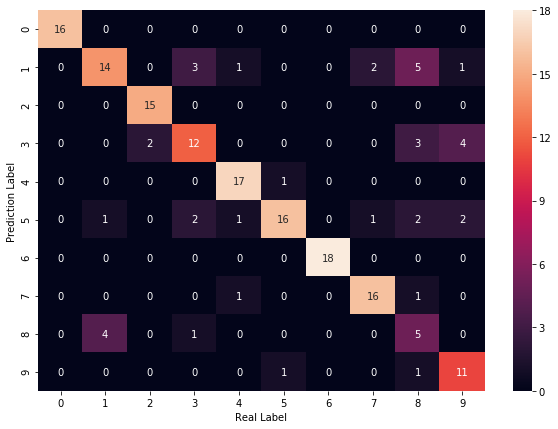

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:11 index:[5] real:5
#1 min_error:12 index:[2] real:2
#2 min_error:12 index:[1] real:8
#3 min_error:5 index:[0] real:0
#4 min_error:10 index:[1] real:1
#5 min_error:10 index:[1] real:7
#6 min_error:5 index:[6] real:6
#7 min_error:5 index:[3] real:3
#8 min_error:5 index:[2] real:2
#9 min_error:12 index:[1] real:1
#10 min_error:14 index:[7] real:7
#11 min_error:12 index:[1] real:4
#12 min_error:9 index:[6] real:6
#13 min_error:8 index:[3] real:3
#14 min_error:10 index:[1] real:1
#15 min_error:9 index:[3] real:3
#16 min_error:12 index:[1] real:9
#17 min_error:5 index:[1] real:1
#18 min_error:13 index:[5] real:7
#19 min_error:3 index:[6] real:6
#20 min_error:12 index:[8] real:8
#21 min_error:9 index:[4] real:4
#22 min_error:5 index:[3] real:3
#23 min_error:11 index:[1] real:1
#24 min_error:9 index:[4] real:4
#25 min_error:6 index:[0] real:0
#26 min_error:5 index:[5] real:5
#27 min_error:4 index:[3] real:3
#28 min_error:12 index:[6] real:6
#29 min_error:12 index:[3] real:9
#30 m

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.8104170961313817

In [17]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.11666666666666667
Accuracy on training set: 0.16666666666666666
Accuracy on training set: 0.22777777777777777
Accuracy on training set: 0.37777777777777777
Accuracy on training set: 0.4166666666666667
Accuracy on training set: 0.4222222222222222
Accuracy on training set: 0.5
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6
Accuracy on training set: 0.6388888888888888
Accuracy on training set: 0.65
Accuracy on training set: 0.6388888888888888
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.7
Accuracy on training set: 0.7
Accuracy on training set: 0.7222222222222222
Accuracy on training set: 0.7277777

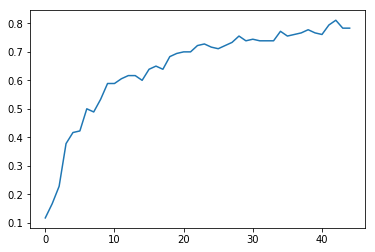

In [18]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
list_acc

[0.11666666666666667,
 0.16666666666666666,
 0.22777777777777777,
 0.37777777777777777,
 0.4166666666666667,
 0.4222222222222222,
 0.5,
 0.4888888888888889,
 0.5333333333333333,
 0.5888888888888889,
 0.5888888888888889,
 0.6055555555555555,
 0.6166666666666667,
 0.6166666666666667,
 0.6,
 0.6388888888888888,
 0.65,
 0.6388888888888888,
 0.6833333333333333,
 0.6944444444444444,
 0.7,
 0.7,
 0.7222222222222222,
 0.7277777777777777,
 0.7166666666666667,
 0.7111111111111111,
 0.7222222222222222,
 0.7333333333333333,
 0.7555555555555555,
 0.7388888888888889,
 0.7444444444444445,
 0.7388888888888889,
 0.7388888888888889,
 0.7388888888888889,
 0.7722222222222223,
 0.7555555555555555,
 0.7611111111111111,
 0.7666666666666667,
 0.7777777777777778,
 0.7666666666666667,
 0.7611111111111111,
 0.7944444444444444,
 0.8111111111111111,
 0.7833333333333333,
 0.7833333333333333]

In [20]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8243661100803958
Avg Base Learner:0.8104170961313817
